Angles between subspaces (in radians): [1.17884502 1.489843   1.61663274 1.64100531 1.73052663 1.02654776
 0.99798662 1.75324751 1.79038382 1.07523614]
Grassmannian distance between subspaces: 4.265060528714256


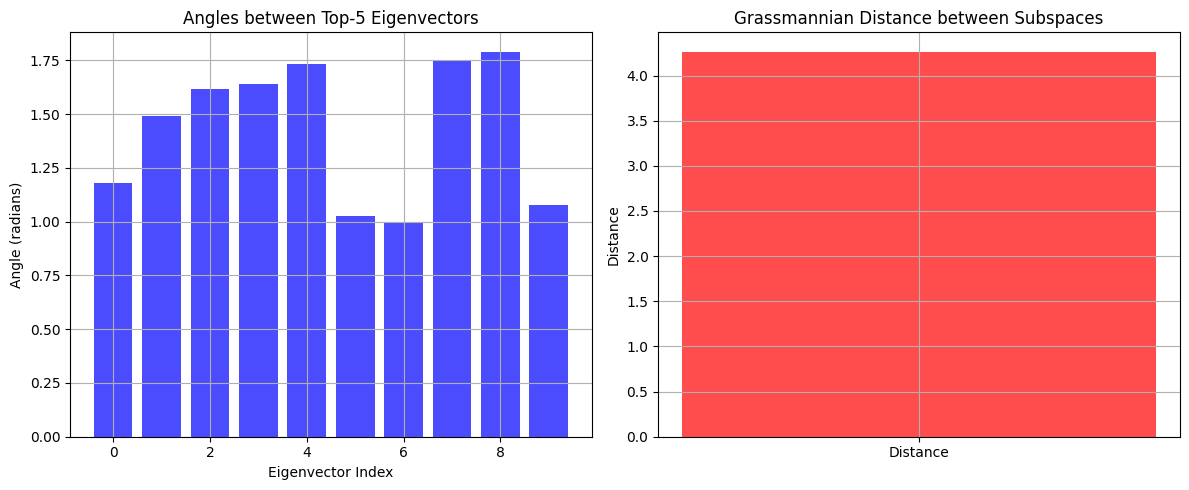

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

def compute_subspace_projection(A, B):
    """
    Project the subspace spanned by eigenvectors of matrix B onto subspace spanned by A.
    This will return a measure of subspace alignment (e.g., overlap or distance).
    """
    # Perform SVD on the eigenvector matrices (assuming they are already orthonormal)
    U, _, _ = svd(A)
    V, _, _ = svd(B)
    
    # Compute the subspace angle between the two matrices U and V
    # Cosine similarity (which measures subspace alignment)
    cosine_similarity = np.dot(U.T, V)
    
    # Calculate the angles (in radians)
    subspace_angles = np.arccos(np.clip(np.diag(cosine_similarity), -1.0, 1.0))
    
    return subspace_angles


def grassmannian_distance(U, V):
    """
    Calculate the Grassmannian distance between two subspaces U and V.
    The Grassmannian distance is the minimal angle between subspaces.
    """
    # Perform SVD for both subspaces (ensure U, V are orthonormal)
    _, _, Vt = svd(U.T @ V)
    
    # Sum of squared angles between corresponding eigenvectors
    distance = np.sqrt(np.sum(np.square(np.arccos(np.clip(np.diag(Vt), -1, 1)))))
    
    return distance


def shared_subspace_analysis(Hessian1, Hessian2, top_k=5):
    """
    Analyze the shared subspace between the eigenvectors of two Hessians.
    
    Args:
        Hessian1, Hessian2: Hessian matrices (numpy arrays) of the two tasks.
        top_k: Number of top eigenvectors to consider for subspace analysis.
    
    Returns:
        Subspace angles or Grassmannian distance indicating the alignment.
    """
    # Step 1: Compute eigenvalues and eigenvectors
    eigvals1, eigvecs1 = np.linalg.eigh(Hessian1)
    eigvals2, eigvecs2 = np.linalg.eigh(Hessian2)
    
    # Step 2: Sort eigenvalues and select top-k eigenvectors
    idx1 = np.argsort(eigvals1)[::-1]  # Sort descending order
    idx2 = np.argsort(eigvals2)[::-1]
    
    top_eigvecs1 = eigvecs1[:, idx1[:top_k]]
    top_eigvecs2 = eigvecs2[:, idx2[:top_k]]
    
    # Step 3: Calculate the shared subspace angles or Grassmannian distance
    angles = compute_subspace_projection(top_eigvecs1, top_eigvecs2)
    distance = grassmannian_distance(top_eigvecs1, top_eigvecs2)
    
    return angles, distance


def plot_shared_subspace_analysis(angles, distance, top_k):
    """
    Visualize the shared subspace analysis using angles and Grassmannian distance.
    """
    # 1. Plot angles between subspaces
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(np.arange(len(angles)), angles, color='b', alpha=0.7)
    plt.title(f"Angles between Top-{top_k} Eigenvectors")
    plt.xlabel('Eigenvector Index')
    plt.ylabel('Angle (radians)')
    plt.grid(True)
    
    # 2. Plot Grassmannian distance
    plt.subplot(1, 2, 2)
    plt.bar([0], [distance], color='r', alpha=0.7)
    plt.title("Grassmannian Distance between Subspaces")
    plt.ylabel('Distance')
    plt.xticks([0], ['Distance'])
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


# Example Hessians (replace these with actual Hessians of your tasks)
Hessian1 = np.random.rand(10, 10)
Hessian2 = np.random.rand(10, 10)

# Perform shared subspace analysis
angles, distance = shared_subspace_analysis(Hessian1, Hessian2, top_k=5)

# Print results
print("Angles between subspaces (in radians):", angles)
print("Grassmannian distance between subspaces:", distance)

# Visualize results
plot_shared_subspace_analysis(angles, distance, top_k=5)
